# Generalized model for obtaining simulations of prices and volatilities with real data taken from an asset

In [1]:
from parameters import obtener_datos_historicos
from functions import generate_heston_paths, graficar_simulacion_precios_y_volatilidades, graficar_simulacion_precio_y_volatilidad2, calcular_precios_de_opciones_para_K, crear_dataframe_de_precios, crear_dataframe_de_precios2, calcular_precios_positivos_y_negativos, graficar_tail_density, calcular_y_graficar_smileBSvolatility, calcular_y_graficar_volatilidades_implícitas, calcular_volatilidades, plot_implied_volatility_surface
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Llama a la función con el ticker y las fechas deseadas
ticker = "AMZN"
start_date = "2018-10-11"
end_date = "2023-10-10"
historical_data, v_0, theta, kappa, sigmaV, rhoSV = obtener_datos_historicos(ticker, start_date, end_date)

In [3]:
historical_data

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2018-10-11,1539264600,87.769997,84.254997,86.199997,85.968002,278718000,85.968002
2018-10-12,1539351000,90.447502,87.126503,90.400002,89.430496,188892000,89.430496
2018-10-15,1539610200,89.752502,86.711502,89.750000,88.047501,128744000,88.047501
2018-10-16,1539696600,91.194000,88.077499,89.175003,90.998001,117198000,90.998001
2018-10-17,1539783000,92.250000,90.349998,92.139503,91.586502,105904000,91.586502
...,...,...,...,...,...,...,...
2023-10-03,1696339800,128.520004,124.250000,128.059998,124.720001,51565000,124.720001
2023-10-04,1696426200,127.360001,125.680000,126.059998,127.000000,44203900,127.000000
2023-10-05,1696512600,126.730003,124.330002,126.709999,125.959999,39660600,125.959999


In [4]:
v_0, theta, kappa, sigmaV, rhoSV

(4.947015289406597,
 1.7048487807574157,
 -0.017755133461977605,
 2.2861716579839215,
 0.17870520625329395)

In [5]:
kappa = kappa
theta = theta
v_0 =  v_0
xi = sigmaV
r = 0.0538 #tomada de https://www.bloomberg.com/markets/rates-bonds/government-bonds/us a un año
S = historical_data["adjclose"].iloc[-1]
Npaths = 5000
steps = 252
T = 1
rho = rhoSV
prices, volatilities = generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi, steps, Npaths, return_vol=True)

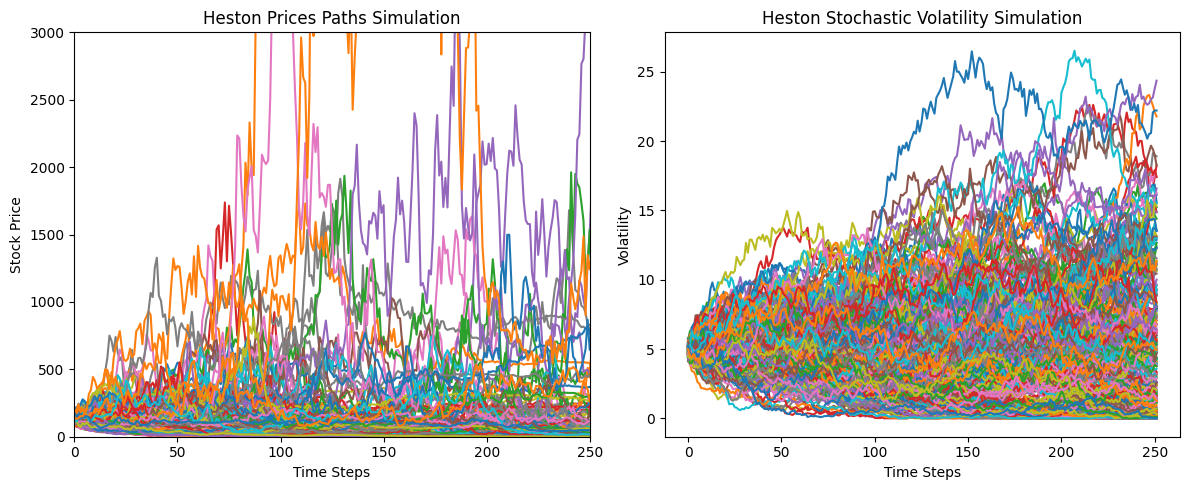

In [6]:
graficar_simulacion_precios_y_volatilidades(prices,volatilities, steps)

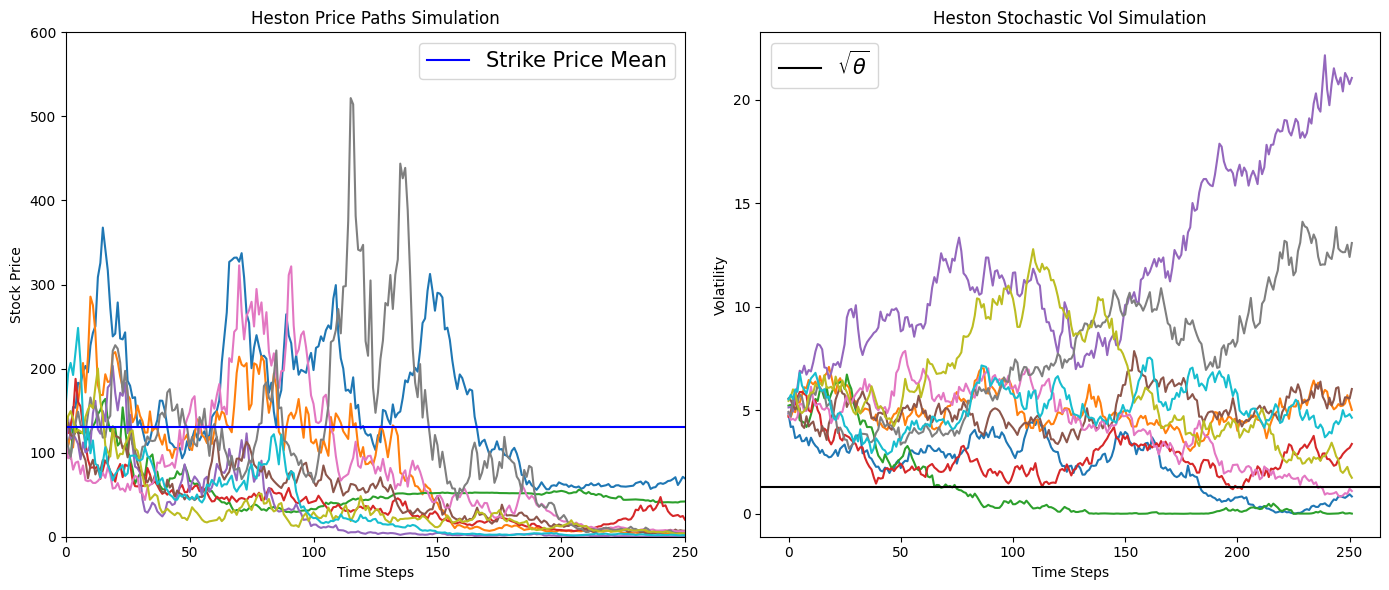

In [7]:
# Llama la función con los datos correspondientes
Npaths2 = 10
steps2 = 252
y = 130
pricesej, volatilitiesej = generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi, steps, Npaths, return_vol=True)
graficar_simulacion_precio_y_volatilidad2(pricesej, volatilitiesej, steps2, y, theta)

In [8]:
k1 = np.linspace(S * 0.3, S * 1.7, num=20)
# Llama la función para crear el DataFrame
df2 = crear_dataframe_de_precios(S, T, r, volatilities, Npaths, k1)
df2

,K_value,Call_Prices,Put_Prices
0,38.477998,"[113.53919399886358, 100.19003391624416, 124.8...","[21.74178231204482, 8.392622229425385, 33.0257..."
1,47.928735,"[111.40466069786616, 95.31663106715942, 124.37...","[28.56297110719194, 12.47494147648519, 41.5350..."
2,57.379471,"[109.49427742619095, 90.94643191514456, 123.97...","[35.608309931661296, 17.0604644206149, 50.0894..."
3,66.830208,"[107.75977100280977, 86.99471806737311, 123.60...","[42.829525604424695, 22.06447266898803, 58.678..."
4,76.280944,"[106.16791954315698, 83.39643400231333, 123.27...","[50.193396240916464, 27.421910700072793, 67.29..."
5,85.731681,"[104.69467540052939, 80.10051425311661, 122.95...","[57.675874194433426, 33.08171304702064, 75.935..."
6,95.182417,"[103.32195884665018, 77.06611448895133, 122.65...","[65.2588797366988, 39.003035378999954, 84.5953..."
7,104.633153,"[102.03576844264003, 74.26003629624267, 122.37...","[72.92841142883321, 45.15267928243585, 93.2712..."
8,114.083890,"[100.82499979972982, 71.6549198465909, 122.113...","[80.67336488206755, 51.503284928928636, 101.96..."
9,123.534626,"[99.68067193025905, 69.22794450698234, 121.860...","[88.48475910874136, 58.03203168546466, 110.664..."


In [9]:
df3 = crear_dataframe_de_precios2(S, T, r, v_0, k1)
df3

,K_value,Call_Prices,Put_Prices
0,38.477998,[127.36849262984303],[35.57108094302426]
1,47.928735,[127.2567436808005],[44.41505409012627]
2,57.379471,[127.1561094509279],[53.270141956398234]
3,66.830208,[127.06398997516553],[62.13374457678045]
4,76.280944,[126.97866323007172],[71.0041399278312]
5,85.731681,[126.89891836203644],[79.8801171559405]
6,95.182417,[126.82386536031848],[88.76078625036709]
7,104.633153,[126.75282726026511],[97.6454702464583]
8,114.083890,[126.68527491089995],[106.53363999323768]
9,123.534626,[126.62078539282203],[115.42487257130436]


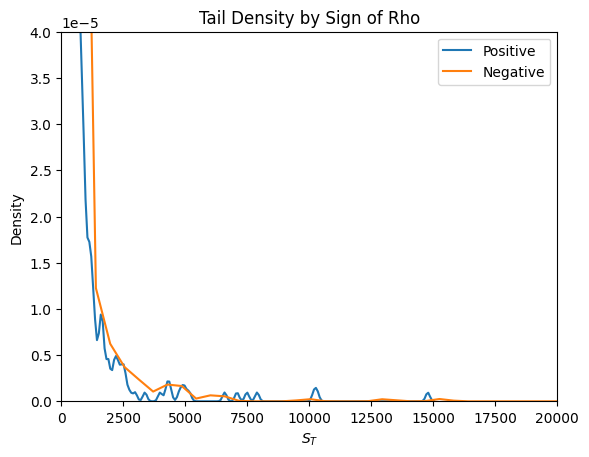

In [10]:
prices_pos, prices_neg = calcular_precios_positivos_y_negativos(S, T, r, kappa, theta, v_0, rhoSV, sigmaV, steps, Npaths)
graficar_tail_density(prices_pos, prices_neg)

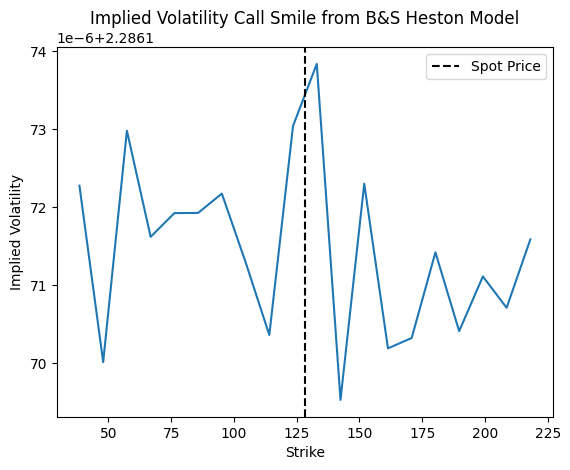

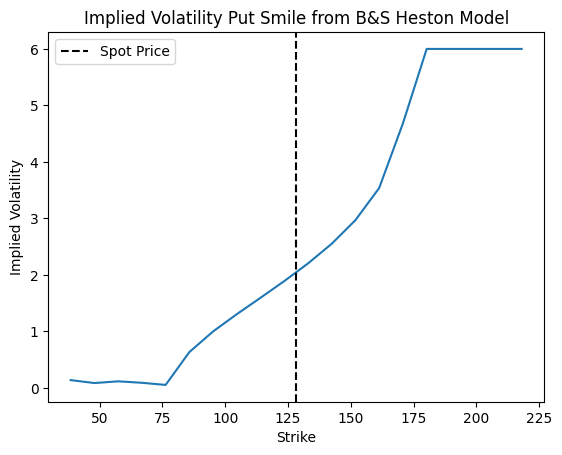

In [11]:
calcular_y_graficar_smileBSvolatility(S, k1, T, r, xi)

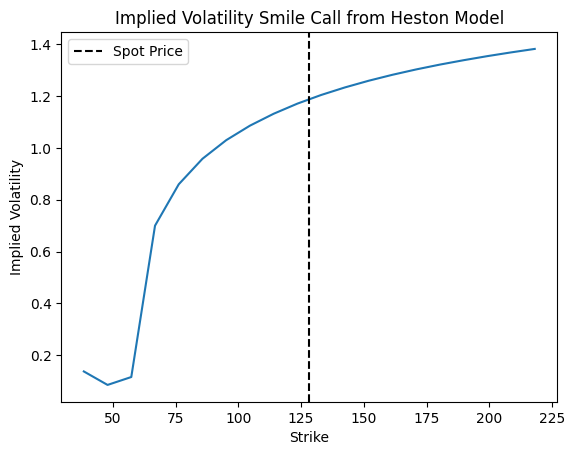

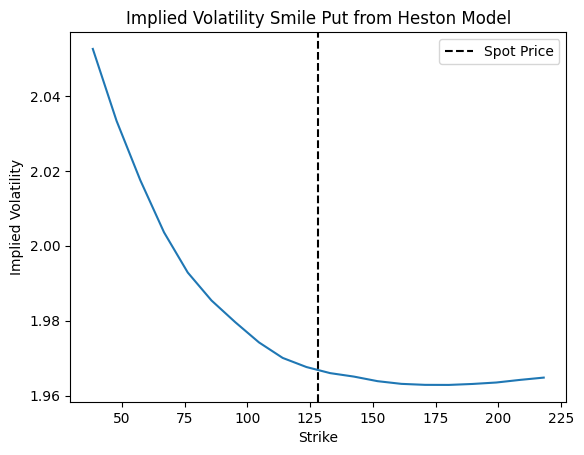

In [12]:
calcular_y_graficar_volatilidades_implícitas(S, k1, T, r, prices_pos, prices_neg, rhoSV, xi, steps, Npaths)

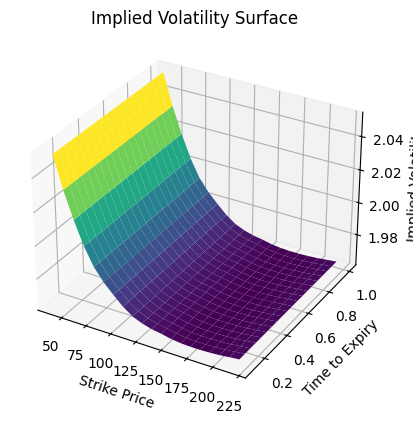

In [13]:
tipo = "put"
tenors = np.linspace(0.1, 1, num=20)
ivs = calcular_volatilidades(tipo, k1, prices_pos, prices_neg, r, T, S)
subput = plot_implied_volatility_surface(k1, tenors, ivs)

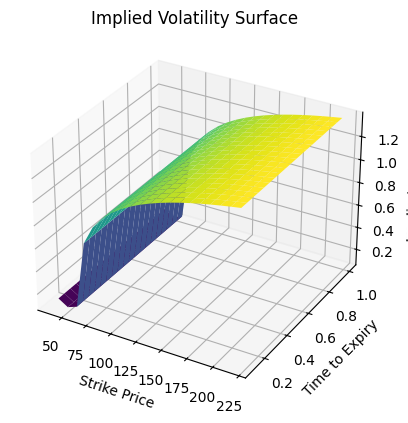

In [14]:
tipo2 = "call"
tenors = np.linspace(0.1, 1, num=20)
ivscall = calcular_volatilidades(tipo2, k1, prices_pos, prices_neg, r, T, S)
subcall = plot_implied_volatility_surface(k1, tenors, ivscall)